In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-cats-image-classification-dataset/animals/cheetah/7fd0843b-e05a-4d86-be8e-d9e19e14f1ad.jpg
/kaggle/input/big-cats-image-classification-dataset/animals/cheetah/55d34830-aa16-42ac-9e82-b87a4fb805be.jpg
/kaggle/input/big-cats-image-classification-dataset/animals/cheetah/f7eb5251-293e-43b5-bd2c-9435cf1d6913.jpg
/kaggle/input/big-cats-image-classification-dataset/animals/cheetah/d170e4d9-ea9d-44cc-8c53-2cfd84a677d2.jpg
/kaggle/input/big-cats-image-classification-dataset/animals/cheetah/faf099e6-a6b7-494c-8cde-a66c75e7e8b9.jpg
/kaggle/input/big-cats-image-classification-dataset/animals/cheetah/f05cc34c-1a77-43ba-b9a2-312d6cb12098.jpg
/kaggle/input/big-cats-image-classification-dataset/animals/cheetah/71598b0a-df4e-419e-a66c-972cd7be374c.jpg
/kaggle/input/big-cats-image-classification-dataset/animals/cheetah/d0e019df-0f5d-4a6d-b1a8-2305057477b2.jpg
/kaggle/input/big-cats-image-classification-dataset/animals/cheetah/832408ec-2187-4133-a65b-20c3f0132d98.jpg
/kaggle/input/big-c

In [7]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 58.8 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import pandas as pd

In [9]:
def ex_hog(img_path,resize_dim=(224,224)):
    img=cv2.imread(img_path)

    img=cv2.resize(img,resize_dim)

    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    features, hog_image=hog(img_gray, 
                                  orientations=9, 
                                  pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), 
                                  transform_sqrt=True, 
                                  block_norm='L2-Hys',
                                  visualize=True)
    return features

In [10]:
dataset_path='/kaggle/input/big-cats-image-classification-dataset/animals'
classes=["cheetah", "leopard", "lion", "tiger"]

X = []  # Đặc trưng
y = []  # Nhãn
image_paths = []  # Đường dẫn ảnh (dùng để kiểm tra)

print("Đang trích xuất đặc trưng HOG...")
for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    
    if not os.path.exists(class_path):
        print(f"Thư mục {class_path} không tồn tại!")
        continue
    
    images = os.listdir(class_path)
    print(f"Đang xử lý lớp {class_name} ({len(images)} ảnh)")
    
    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        
        # Trích xuất HOG features
        features = ex_hog(img_path)
        
        if features is not None:
            X.append(features)
            y.append(class_idx)
            image_paths.append(img_path)

# Chuyển sang numpy array
X = np.array(X)
y = np.array(y)

print(f"\nTổng số mẫu: {len(X)}")
print(f"Số đặc trưng HOG mỗi mẫu: {X.shape[1]}")
print(f"Số lượng mỗi lớp: {pd.Series(y).value_counts().to_dict()}")




Đang trích xuất đặc trưng HOG...
Đang xử lý lớp cheetah (186 ảnh)
Đang xử lý lớp leopard (180 ảnh)
Đang xử lý lớp lion (182 ảnh)
Đang xử lý lớp tiger (190 ảnh)

Tổng số mẫu: 738
Số đặc trưng HOG mỗi mẫu: 26244
Số lượng mỗi lớp: {3: 190, 0: 186, 2: 182, 1: 180}



Dữ liệu huấn luyện: 590 mẫu
Dữ liệu kiểm tra: 148 mẫu

Đang huấn luyện Random Forest...

Độ chính xác (Accuracy): 0.4595 (45.95%)


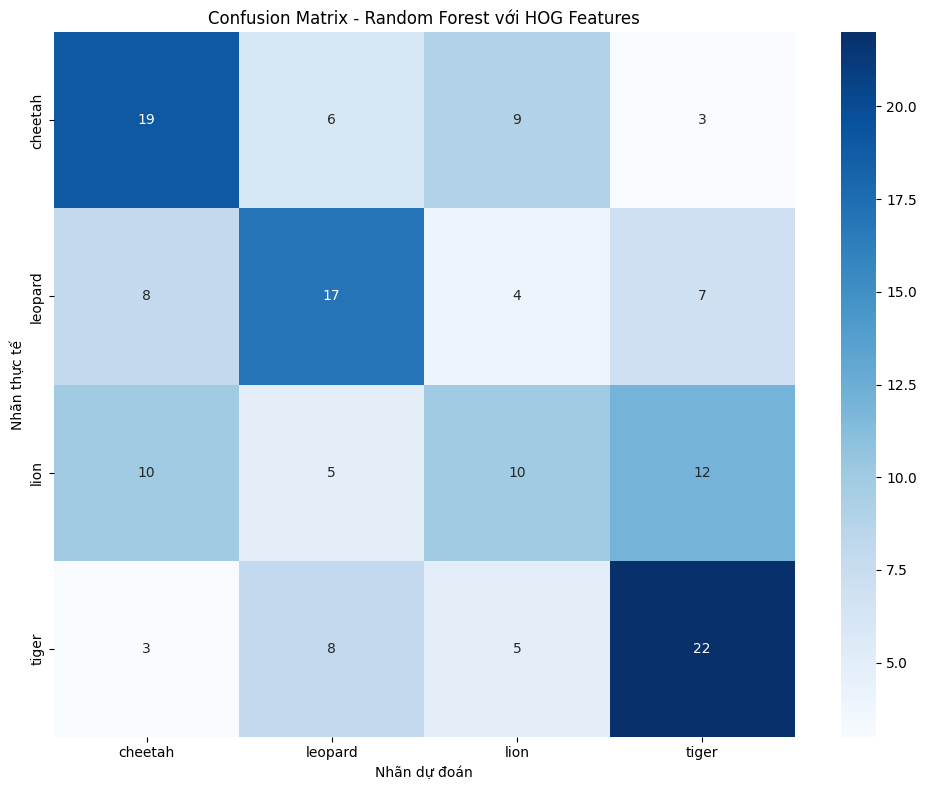


BÁO CÁO PHÂN LOẠI (Classification Report)
              precision    recall  f1-score   support

     cheetah       0.47      0.51      0.49        37
     leopard       0.47      0.47      0.47        36
        lion       0.36      0.27      0.31        37
       tiger       0.50      0.58      0.54        38

    accuracy                           0.46       148
   macro avg       0.45      0.46      0.45       148
weighted avg       0.45      0.46      0.45       148


CONFUSION MATRIX (Dạng bảng)
         cheetah  leopard  lion  tiger
cheetah       19        6     9      3
leopard        8       17     4      7
lion          10        5    10     12
tiger          3        8     5     22


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDữ liệu huấn luyện: {X_train.shape[0]} mẫu")
print(f"Dữ liệu kiểm tra: {X_test.shape[0]} mẫu")

print("\nĐang huấn luyện Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=range(len(classes)))


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Random Forest với HOG Features')
plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.tight_layout()
plt.show()

# 7.2. Classification Report
print("\n" + "="*50)
print("BÁO CÁO PHÂN LOẠI (Classification Report)")
print("="*50)
report = classification_report(y_test, y_pred, target_names=classes)
print(report)

# 7.3. Confusion Matrix dạng bảng
print("\n" + "="*50)
print("CONFUSION MATRIX (Dạng bảng)")
print("="*50)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
print(cm_df)

